In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import preprocessing as pp
%matplotlib inline

In [15]:
def two_digits_n(n):
    if n<10:
        return '0' + str(n)
    else:
        return str(n)

In [19]:
xcel = pd.read_excel(
    '/Volumes/Daive/spring_2016/excel/spring_2016.xlsx', 
    'Cleaned', 
    index_col='coil'
)

In [21]:
xcel

,coil_chrono,coil_number,datum_post,real_date,time,length,width,thickness,weight,inspection,sticking,learning,testing,startS,endS,sticking_length,sticking_ratio,special_case,remark,downloaded
coil,,,,,,,,,,,,,,,,,,,,
0,53,61329256,2016-06-18,2016-06-18,2016-09-12 01:13:30,1806,1673,1.25,29.718,1,1,1,1,0.0,1112.0,1112,0.615725,0,NaN,1
1,43,60674005,2016-05-28,2016-05-28,2016-09-12 03:29:05,3306,1662,0.69,29.510,1,1,1,1,0.0,1910.0,1910,0.577737,0,NaN,1
2,50,61157303,2016-06-13,2016-06-13,2016-09-12 00:28:58,3306,1643,0.69,29.490,1,1,1,1,0.0,1625.0,1625,0.491531,0,NaN,1
3,39,60011835,2016-05-05,2016-05-05,2016-09-12 11:58:17,3186,1557,0.66,25.828,1,1,1,1,0.0,1500.0,1500,0.470810,0,NaN,1
4,42,60179906,2016-05-11,2016-05-11,2016-09-12 12:56:20,3226,1846,0.60,28.061,1,1,1,1,100.0,1506.0,1406,0.435834,0,NaN,1
5,0,58360839,2016-03-12,2016-03-12,2016-04-11 11:26:26,2588,1579,0.64,20.646,1,1,1,1,142.0,1092.0,950,0.367079,0,NaN,1
6,28,59610261,2016-04-23,2016-04-23,2016-05-09 00:11:13,3368,1633,0.69,29.872,1,1,1,1,74.0,1273.0,1199,0.355998,0,NaN,1
7,59,61441985,2016-06-22,2016-06-22,2016-09-12 00:14:09,3382,1614,0.69,29.692,1,1,1,1,0.0,1175.0,1175,0.347428,0,NaN,1
8,24,59518934,2016-04-18,2016-04-18,2016-05-09 04:01:59,3437,1600,0.69,29.808,1,1,1,1,37.0,1171.0,1134,0.329939,0,NaN,1


In [17]:
nom = '/Volumes/Daive/spring_2016/txt/coil_'
col_names = ['Time', 'Signal', 'Accelerometer', 'Speed', 'Distance', 'Decoiler']

num = two_digits_n(1)
fichier = nom + num + '.txt'
df = pd.read_csv(
    fichier,
    sep='\t',
    names=col_names,
    skiprows=11,
    header=0,
    index_col=None
    )

In [25]:
df.head(0)

,Time,Signal,Accelerometer,Speed,Distance,Decoiler


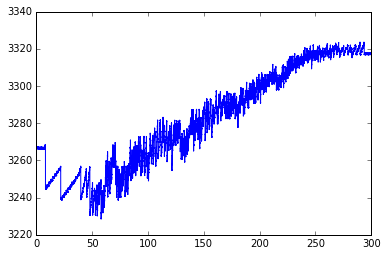

In [32]:
plt.plot(df.Time, df.Decoiler+df.Distance)

In [36]:
len(df)/10000/60.

4.983333333333333